# CLASSIFICATION ANALYSIS

## BINARY CLASSIFICATION

### Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('/home/bakary/Desktop/ML_Folder1/data1/Admission.csv')
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [5]:
len(df)

40

In [6]:
# split the data into x and y
x=df.drop('admitted', axis=1)
y=df['admitted']

In [7]:
x

,gmat,gpa,work_experience
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4
5,730,3.7,6
6,690,2.3,1
7,720,3.3,4
8,740,3.3,5
9,690,1.7,1


In [8]:
y

0     1
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     1
9     0
10    0
11    1
12    1
13    0
14    1
15    0
16    0
17    1
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    1
29    1
30    0
31    0
32    1
33    1
34    1
35    0
36    0
37    0
38    0
39    1
Name: admitted, dtype: int64

In [12]:
# split the data into train and test set
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=0.25,
                                                 random_state=0)

In [13]:
y_test

22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
18    0
29    1
Name: admitted, dtype: int64

In [14]:
len(y_test)

10

In [35]:
# Instantiate the model
model=LogisticRegression()

In [36]:
# Fit the model on the training data
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
# Make prediction on the test set
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [38]:
y_test

22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
18    0
29    1
Name: admitted, dtype: int64

In [39]:
test1 = model.score(x_test, y_test)
print(f'The accuracy score is: {test1*100:.2f}%')

The accuracy score is: 80.00%


#### Model Evaluation 

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 1],
       [1, 4]])

In [42]:
import seaborn as sn
%matplotlib inline

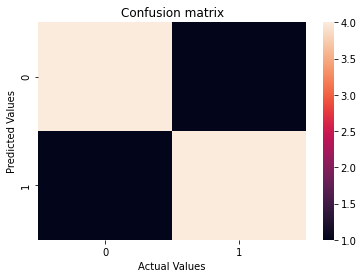

In [43]:
sn.heatmap(pd.DataFrame(cnf_matrix))
plt.title('Confusion matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [44]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [50]:
# Let check if a student have gmat=699, gpa=3.1 and work
# experience=3 years, wheather he will get admission or not
adm = model.predict([[699,3.1,3]])
adm

array([1])

## DECISION TREE

In this project, we are predicting whether or not someone has diabetes based on the information of the person provided to us, such as;
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPerdigreeFunction
* Age


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [52]:
# Load the dataset
df1 = pd.read_csv('/home/bakary/Desktop/ML_Folder1/data1/Diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
# split the data into x and y
x1=df1.drop('Outcome', axis=1)
y1=df1['Outcome']

In [65]:
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [66]:
y1

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [56]:
len(df1)

768

In [67]:
# Split the data into train and test set
x1_train, x1_test, y1_train,y1_test=train_test_split(x1,y1,
                                                test_size=0.2,
                                                random_state=0)


In [60]:
len(x_train),  len(y_train),len(x_test),len(y_test)

(614, 614, 154, 154)

In [59]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


In [69]:
# Instantiate the model
model1=DecisionTreeClassifier()

In [70]:
# Fit the model
model1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [71]:
# check the accuracy score of the model
clf = model1.score(x1_test,y_test)
print(f'The Accuracy score of the model is: {clf*100:.2f}%')

The Accuracy score of the model is: 77.92%


In [72]:
# predict on the test set
y1_pred = model1.predict(x1_test)
y1_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
y1_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [78]:
x1_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [79]:
lamin = model1.predict([[4,5,45,40,150,68,1, 30]])
lamin

array([1])

## SUPPORT VECTOR MACHINE (SVM)

In this project, we are predicting whether or not someone has diabetes based on the information of the person provided to us, such as;
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPerdigreeFunction
* Age


In [80]:
from sklearn import svm

In [81]:
df2 = pd.read_csv('/home/bakary/Desktop/ML_Folder1/data1/Diabetes.csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
# Split the data into x and y
x2 = df2.drop('Outcome', axis=1)
y2 = df2['Outcome']

In [83]:
# Split the data into train and test set
x2_train,x2_test, y2_train, y2_test=train_test_split(x2,y2,
                                                    test_size=0.2,
                                                    random_state=0)

In [86]:
# Instantiate the model
model2 = svm.SVC(kernel = 'linear')

In [87]:
# fit the model
model2.fit(x2_train, y2_train)

SVC(kernel='linear')

In [88]:
# Evaluate the accuracy of the model
clf2=model2.score(x2_test, y2_test)
print(f'The Accuracy of the model is: {clf2*100:.2f}%')

The Accuracy of the model is: 81.82%


In [90]:
# Make prediction on the model
y2_pred = model2.predict(x2_test)
y2_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [91]:
y2_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [93]:
# Make prediction on a new data
Amadou = model1.predict([[4,5,45,40,150,68,1, 30]])
Amadou

array([1])